![png](../../../imagenes/logotipo-axity-ppt.png)

# Principal Component Analysis (PCA)

## Explicación del Ejemplo

El propósito de este ejemplo es identificar si una imagen contiene un rostro humano. Se utilizará PCA, para reducir el número de características a utilizar.

### Los datos
Se utilizará el conjunto de datos fetch_olivetti_faces de sklearn.  

El conjunto contiene imágenes de rostros humanos, tomadas entre abril 1992 y abril 1994, en los laboratorios AT&T de Cambridge.  
Hay 10 imágenes diferentes de 40 personas distintas. Para algunas personas, las imágenes fueron tomadas en tienmpos diferentes, variando las condiciones de luz, expresiones faciales y detalles faciales (por ejemplo anteojos).  
Son imágenes de 64x64 pixeles y se ajustaron a 256 niveles de gris. Están almacenadas como enteros de 8-bits sin signo.  
Las imágenes tienen una etiqueta entre 0 y 39, indicando la identidad de la persona.  

In [1]:
# Importemos las librerias
import matplotlib.pyplot as plt
import numpy as np

## Examinar los datos

In [2]:
# Importemos el conjunto de datos
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

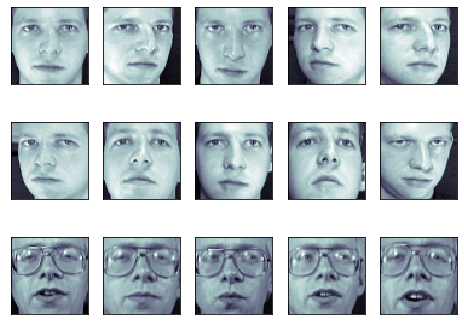

In [3]:
# Visualicemos los datos
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

## PCA

In [4]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [5]:
# Reducir la dimensión del dataset con PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

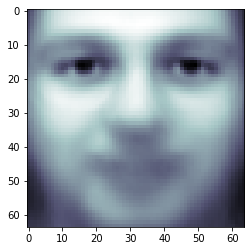

In [6]:
# PCA calcula la media de un rostro. Visualicemos un ejemplo
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

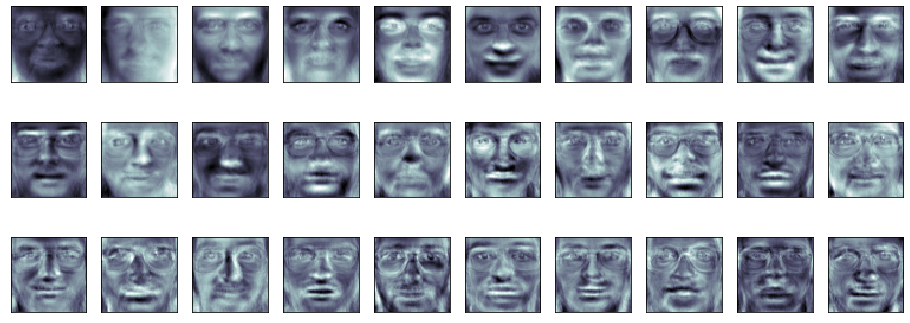

In [7]:
# Visualicemos los rostros generados a partir de los componentes seleccionados por PCA
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [8]:
# Apliquemos PCA a nuestros conjuntos de entrenamiento y prueba
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


## Entrenar el modelo

In [9]:
# Ajustar el modelo de SVM en el Conjunto de Entrenamiento
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

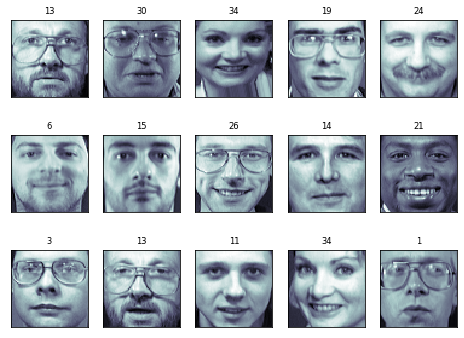

In [10]:
# Predicción de los resultados con el Conjunto de Prueba
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

y_pred = clf.predict(X_test_pca)

In [11]:
# Elaborar una matriz de confusión
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [12]:
# Obtener el informe de clasificación
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      0.83      0.91         6
          19       1.00      1.00      1.00         4
          20       1.00    